# Task 3 Employee Score
## import labeled dataset

In [37]:
import pandas as pd
df = pd.read_csv("test_labeled (6).xls")

## Create new column for employee score

In [38]:
#convert date column into datetime format
df['date'] = pd.to_datetime(df['date'])
#create a new column to respresnt the month of the message
df['year_month'] = df['date'].dt.to_period('M')

#create a dictionary to store label scores
sentiment_score_map = {
    'positive': 1,
    'negative': -1,
    'neutral': 0
}

#create a new column that map from the label in sentiment column to a score based on the created dictionary 
df['sentiment_score'] = df['sentiment'].map(sentiment_score_map)

## calculate the monthly score and store into a new dataframe

In [39]:
#create new dataframe to store the email addresses, month of the message and sum up their sentiment score
monthly_scores = df.groupby(['from', 'year_month'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'from': 'employee', 'sentiment_score': 'monthly_score'}, inplace=True)
#sort the data by month
monthly_scores.sort_values(by=['employee', 'year_month'], inplace=True)

print(monthly_scores.head())

                      employee year_month  monthly_score
0  bobette.riner@ipgdirect.com    2010-01              2
1  bobette.riner@ipgdirect.com    2010-02              8
2  bobette.riner@ipgdirect.com    2010-03              8
3  bobette.riner@ipgdirect.com    2010-04              5
4  bobette.riner@ipgdirect.com    2010-05              2


In [40]:
monthly_scores.to_csv('monthly_employee_sentiment_scores.csv', index=False, encoding='utf-8-sig')

In [41]:
from IPython.display import FileLink

FileLink('monthly_employee_sentiment_scores.csv')

C:\Users\tippi\monthly_employee_sentiment_scores.csv

# Task 4 Employee Ranking
## Top Three Positive Employees

In [42]:
#sort dataframe by score and month
monthly_scores_sorted = monthly_scores.sort_values(
    by=['year_month', 'monthly_score', 'employee'],
    ascending=[True, False, True]
)

#print dataframe with all score and month sorted
print(monthly_scores_sorted)

                        employee year_month  monthly_score
120      kayne.coulter@enron.com    2010-01             14
144      lydia.delgado@enron.com    2010-01             11
48           eric.bass@enron.com    2010-01              9
168     patti.thompson@enron.com    2010-01              8
24        don.baughman@enron.com    2010-01              7
..                           ...        ...            ...
239         sally.beck@enron.com    2011-12              7
47        don.baughman@enron.com    2011-12              5
95         john.arnold@enron.com    2011-12              4
23   bobette.riner@ipgdirect.com    2011-12              3
119      johnny.palmer@enron.com    2011-12              2

[240 rows x 3 columns]


In [43]:
#only select top 3 employee ranking in 2010 Jan
top3_january = (
    monthly_scores[monthly_scores['year_month'] == '2010-01']
    .sort_values(by=['monthly_score', 'employee'], ascending=[False, True])
    .head(3)
)

In [44]:
print(top3_january)

                    employee year_month  monthly_score
120  kayne.coulter@enron.com    2010-01             14
144  lydia.delgado@enron.com    2010-01             11
48       eric.bass@enron.com    2010-01              9


## Top Three Negative Employees

In [45]:
#sort dataframe by negative score and month
top_negative = monthly_scores.sort_values(
    by=['year_month', 'monthly_score', 'employee'],
    ascending=[True, True, True]
).groupby('year_month').head(3)

In [46]:
#only select top 3 employee negatvie ranking in 2010 Jan
top3_n_january = (
    monthly_scores[monthly_scores['year_month'] == '2010-01']
    .sort_values(by=['monthly_score', 'employee'], ascending=[True, True])
    .head(3)
)

In [47]:
print(top3_n_january)

                        employee year_month  monthly_score
192      rhonda.denton@enron.com    2010-01              1
0    bobette.riner@ipgdirect.com    2010-01              2
96       johnny.palmer@enron.com    2010-01              3


# Visualization

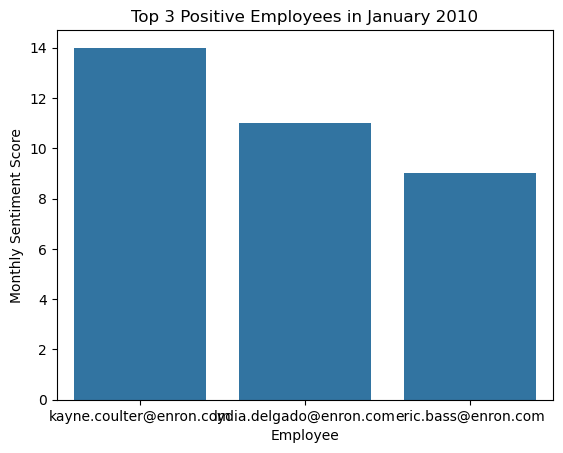

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
jan_2010_positive = top3_january[top3_january['year_month'].dt.strftime('%Y-%m') == '2010-01']
sns.barplot(
    data=jan_2010_positive,
    x='employee',
    y='monthly_score',
)
plt.title('Top 3 Positive Employees in January 2010')
plt.ylabel('Monthly Sentiment Score')
plt.xlabel('Employee')
plt.show()

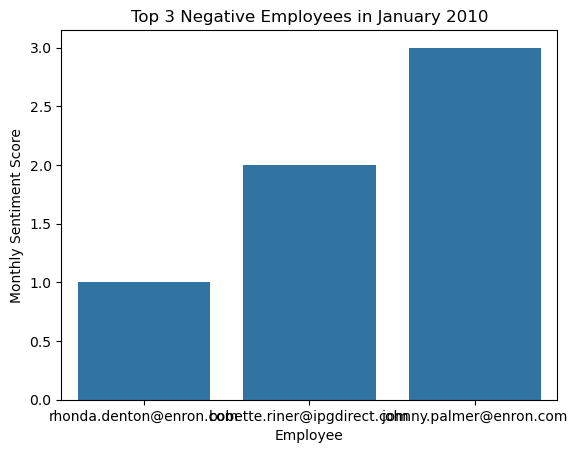

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
jan_2010_negative = top_negative[top_negative['year_month'].dt.strftime('%Y-%m') == '2010-01']
sns.barplot(
    data=jan_2010_negative,
    x='employee',
    y='monthly_score',
)
plt.title('Top 3 Negative Employees in January 2010')
plt.ylabel('Monthly Sentiment Score')
plt.xlabel('Employee')
plt.show()